# Fig12b. Repeat divergence (Jukes Cantor)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
 

In [2]:
import re
def natural_sort(l): 
    convert = lambda text: int(text) if text.isdigit() else text.lower() 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(l, key = alphanum_key)
def load_genome_index(index_file, chr_prefix):
    Genome_index = pd.read_csv(index_file, sep='\t', names=['Chr','Length','A','B','C'])
    Genome_index = Genome_index[Genome_index.Chr.str.startswith(chr_prefix)][['Chr','Length']]
    new_indexes = []
    for i in natural_sort(Genome_index.Chr): 
        new_indexes.append(Genome_index.Chr.to_list().index(i))
    Genome_index = Genome_index.loc[new_indexes].reset_index()
    Genome_index = Genome_index.drop(columns='index')
    return(Genome_index)

def load_Centromeric_positions_for_Xtr(file_path):
    Xtr_Centromeric_pos = pd.read_csv(file_path,sep='\t')
    return(Xtr_Centromeric_pos)

def JC_divergence(divergence):
    JC = -3/4*np.log(1-4*(float(divergence)/100)/3)
    return(JC)



In [3]:
source_data_path = '/Users/sofiamr/Downloads/SourceData/'
sup_fig = 'Supplementary_Fig.9/'

paths_files_fig = ''.join((source_data_path,sup_fig))

XL_file = ''.join((paths_files_fig,'XL9_2.repeatMasked.gff'))

table_new_classifications = ''.join((source_data_path,'Supplementary_Fig.5/Repeat_Classification_table.tab'))
table_new_classifications = ''.join((source_data_path,'Supplementary_Fig.5/Repeat_Classification_table.tab'))


In [4]:
chr_sizes = pd.read_csv(''.join((source_data_path,'Fig.2/Xtr_chr_sizes.tab')), sep='\t')
Xtrop_centromere_positon = load_Centromeric_positions_for_Xtr(''.join((source_data_path,'/Supplementary_Fig.3/Supplementary_Fig.3a/Xtr_centromeric_repeats.tab')))

In [5]:
#Specie_table[Specie_table.Abr=='Xtr'].Repeat_file[4]
Xtr_rm = pd.read_csv('/Users/sofiamr/Documents/Rocksar Lab/X_tropicalis_V10Final/Paper_Data_022022/Fig.4/XENTRv10-1.repeatMasked.gff', sep='\t', names=['Chr','RM','NA','Start','End','Percent_divergence','Strand','Frame','Descriptor'])
Xtr_rm = Xtr_rm[Xtr_rm.Chr.str.startswith('Chr')]
Xtr_rm['Length'] =  abs(Xtr_rm.End - Xtr_rm.Start)
Xtr_rm['JC']     = Xtr_rm.Percent_divergence.apply(lambda x: JC_divergence(x))
Xtr_rm['Midpoint'] = Xtr_rm.End - Xtr_rm.Start

Xtr_rm['Class'] = Xtr_rm.Descriptor.apply(lambda x: x.split('"')[3])
Xtr_rm['Motif'] = Xtr_rm.Descriptor.apply(lambda x: ''.join((x.split('"')[3],': ', x.split('"')[1].replace('Motif:',''))))


In [6]:
Repeat_classification = pd.read_csv(table_new_classifications, sep='\t')#, index=False)
Xtr_rm_reclassified = pd.merge(Xtr_rm,Repeat_classification[['Class','Classification','Type','SubClass','New_Subtype']], on='Class', how='left')
Xtr_rm_reclassified = Xtr_rm_reclassified.sort_values(['Chr','Start','End'])
Xtr_rm_reclassified.head()

Chr            RM          NA  Start   End  Percent_divergence  \
169179  Chr1  RepeatMasker  similarity      1   654                23.4   
169180  Chr1  RepeatMasker  similarity    388   664                19.9   
169181  Chr1  RepeatMasker  similarity    665   900                20.1   
169182  Chr1  RepeatMasker  similarity    901   933                 0.0   
169183  Chr1  RepeatMasker  similarity    934  1698                19.2   

       Strand Frame                                         Descriptor  \
169179      +     .  Target "Motif:Xtr-6_family-8594" 44 704;class ...   
169180      +     .       Target "Motif:hAT-9A_XT" 221 355;class "hAT"   
169181      +     .  Target "Motif:Xtr-6_family-8594" 1 193;class "...   
169182      +     .  Target "Motif:(TCTGCC)n" 1 33;class "Simple_re...   
169183      +     .  Target "Motif:Xtr-6_family-8594" 1 409;class "...   

        Length        JC  Midpoint          Class  \
169179     653  0.373966       653     DNA/hAT-Ac   
169180     276  0.308338       276            hAT   
169181     235  0.311975       235     DNA/hAT-Ac   
169182      32 -0.000000        32  Simple_repeat   
169183     764  0.295714       764     DNA/hAT-Ac   

                                Motif  Classification           Type  \
169179  DNA/hAT-Ac: Xtr-6_family-8594  DNA Transposon            hAT   
169180                 hAT: hAT-9A_XT  DNA Transposon            hAT   
169181  DNA/hAT-Ac: Xtr-6_family-8594  DNA Transposon            hAT   
169182       Simple_repeat: (TCTGCC)n  Tandem Repeats  Simple_repeat   
169183  DNA/hAT-Ac: Xtr-6_family-8594  DNA Transposon            hAT   

             SubClass    New_Subtype  
169179         hAT-Ac    hAT: hAT-Ac  
169180            hAT            hAT  
169181         hAT-Ac    hAT: hAT-Ac  
169182  Simple_repeat  Simple_repeat  
169183         hAT-Ac    hAT: hAT-Ac

In [7]:
Rec_rate = pd.read_csv(''.join((source_data_path,'Fig.2/Xtropicalis_Recombination_Rates_Final.tab')), sep='\t')
Rec_rate.head()

Chr      Pos  delta_pos  delta_CC  Smooth_Genetic_distance  \
0  Chr1  4000000     500000  0.845459                 0.000000   
1  Chr1  4500000     500000  1.021646                 0.845459   
2  Chr1  5000000     500000  1.181592                 1.867105   
3  Chr1  5500000     500000  1.325296                 3.048697   
4  Chr1  6000000     500000  1.452757                 4.373993   

   Smooth_Recombination_Rate      Start Rec_rate     Chr domain   Chr domains  
0                   1.690918  4250000.0     High  p-Subtelomere  Subtelomeres  
1                   2.043293  4750000.0     High  p-Subtelomere  Subtelomeres  
2                   2.363184  5250000.0     High  p-Subtelomere  Subtelomeres  
3                   2.650591  5750000.0     High  p-Subtelomere  Subtelomeres  
4                   2.905515  6250000.0     High  p-Subtelomere  Subtelomeres

In [8]:
blast_Cent_consensus_file_2 = '/Users/sofiamr/Documents/Rocksar Lab/X_tropicalis_V10Final/IGC_7/Final Files/Figures/XtropV10.7/Tandem/TRF_Out/XEN_CONSENSUS_Clust_represent.blast'
blast_Cent_consensus_ = pd.read_csv(blast_Cent_consensus_file_2, sep='\t', names=['qseqid','Chr','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore'])
blast_Cent_consensus_ = blast_Cent_consensus_[blast_Cent_consensus_.Chr.str.startswith('Chr')]
blast_Cent_consensus_['midpoint'] = (blast_Cent_consensus_.sstart +blast_Cent_consensus_.send)/2
blast_Cent_consensus_ = blast_Cent_consensus_.sort_values(['Chr','sstart','send'])
print "Done reading monomer blast"

blast_Cent_consensus_.head()



Done reading monomer blast


qseqid   Chr  pident  length  mismatch  \
733346  Chr7:60992377-60993643:130,9.8,130  Chr1  96.907      97         3   
732026  Chr7:60992377-60993643:130,9.8,130  Chr1  97.744     133         0   
732027  Chr7:60992377-60993643:130,9.8,130  Chr1  97.744     133         0   
732605  Chr7:60992377-60993643:130,9.8,130  Chr1  96.992     133         1   
732606  Chr7:60992377-60993643:130,9.8,130  Chr1  96.992     133         1   

        gapopen  qstart  qend  sstart   send        evalue  bitscore  midpoint  
733346        0       1    97   40415  40319  8.280000e-39     163.0   40367.0  
732026        1       1   130   40548  40416  1.040000e-57     226.0   40482.0  
732027        1       1   130   40681  40549  1.040000e-57     226.0   40615.0  
732605        1       1   130   40814  40682  4.840000e-56     220.0   40748.0  
732606        1       1   130   40947  40815  4.840000e-56     220.0   40881.0

5637 51 265 0.4175376893424335


/Users/sofiamr/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


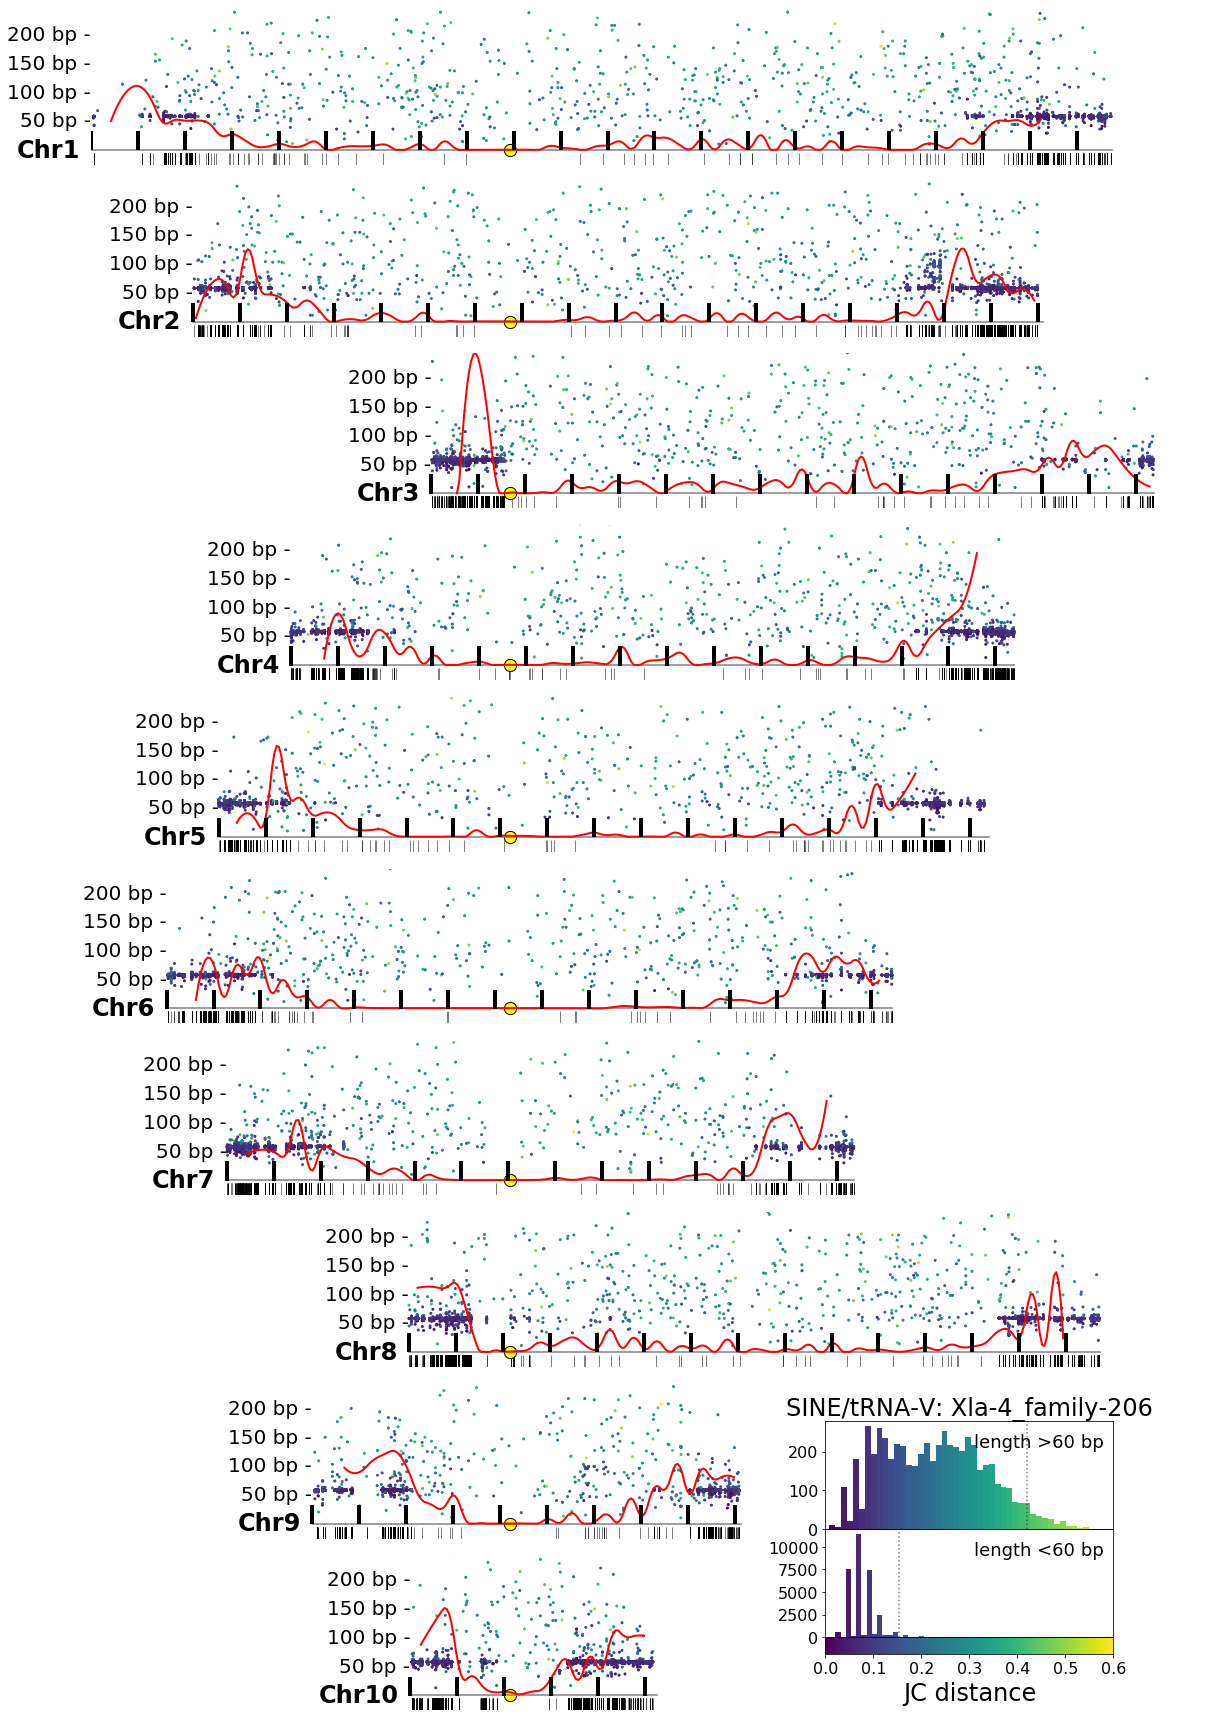

In [9]:
####### FOR PAPER
import matplotlib as mpl

Mb = 1000000

Repeat_gff_reclassified = Xtr_rm_reclassified

figure_size = (16,24)
scaler = 2


JC_max_val=0.5

repeat_name_ = 'SINE/tRNA-V: Xla-4_family-206'
monomer_name_ = 'Chr3:13767515-13767949:52,8.5,52'
title = repeat_name_

JC_max_val = np.round(np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC,99),1) 
JC_max_val = .6

list_chromosomes = chr_sizes.Chr.tolist()

CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]

Largest_chr_len = float(chr_sizes.Length.max())*1.1


max_y_value, max_axis = 1,1
min_axis = -0.1

max_Length_sat = np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif==repeat_name_)].Length,99.9)
counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=figure_size)



for Chr_ in list_chromosomes:
    To_plot = Repeat_gff_reclassified[(Repeat_gff_reclassified.Chr==Chr_)]
    To_plot2 = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_)]  

    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
    chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
    
    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1, max_axis*1))
    
    axs[counter].text(delta_centromere/Largest_chr_len-0.01, 0, Chr_, fontsize=12*scaler, ha='right', va='center' , fontweight='bold')
    axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

    for repeat_name in [repeat_name_] :
        axs[counter].scatter((To_plot[To_plot.Motif==repeat_name].Start + delta_centromere)/Largest_chr_len, (To_plot[To_plot.Motif==repeat_name].Length)/max_Length_sat, c= To_plot[To_plot.Motif==repeat_name].JC,  alpha=1 , s=2*scaler, label=repeat_name,  cmap='viridis', vmax=JC_max_val, vmin=0) 
   
    ypos_inc = increment = (1/float(len([monomer_name_])))
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    if len(Rec_rate) > 0:
        x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='red', linewidth=1*scaler, alpha=1)

    ypos_inc = increment = (1/float(len([monomer_name_])))
    for monomer_name in [monomer_name_] :
        axs[counter].scatter(np.array((To_plot2[To_plot2.qseqid==monomer_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot2[To_plot2.qseqid==monomer_name].midpoint)*[-.1], marker='|', alpha=1 , s=250*scaler, linewidth=.5, color='black',  label=monomer_name)

    
    for y_pos in range(0,int(max_Length_sat),50):
        if y_pos>0:
            #axs[counter].text((Chr_size_+ delta_centromere)/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp')), fontsize=10, horizontalalignment='right', va='center')
            axs[counter].text(delta_centromere/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp -')), fontsize=10*scaler, horizontalalignment='right', va='center')
    
    axs[counter].scatter(CTR_pos_normalized, 0, alpha=1, s=75*scaler, facecolor='yellow', edgecolors='black',  marker="o")#color='white')  # Centromere dot at the center of each chr

    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.1, ymax= .2,  alpha=1, color='black', linewidth=2*scaler)
        #axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .05,  alpha=1, color='black', linewidth=2) 
    counter=counter+1


    
x_p = 0.65  ; y_p = 0.04 
width_ = 0.25; height_ = 0.01
cax = fig.add_axes([x_p, y_p, width_, height_])
cmap = mpl.cm.viridis

norm = mpl.colors.Normalize(vmin=0, vmax=JC_max_val )
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,  norm=norm, orientation='horizontal')
label_ =''.join(('JC distance'))
cb2.set_label(label_, labelpad=5, y=1.2, fontsize=12*scaler)
x_tix_box = list(np.arange(0,JC_max_val+.1,.1))
cb2.set_ticks(x_tix_box,x_tix_box)
for t in cb2.ax.get_xticklabels():
     t.set_fontsize(8*scaler)
#cb2.tick_params(fontsize=10*scaler)
#cb2.tick_params(cb2.get_xticklabels(), fontsize=10*scaler)#, fontweight="bold", horizontalalignment="left")


### 1)
x_p = x_p  ; y_p = y_p+height_
width_ = 0.25; height_ = 0.125/2
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_])) & (Repeat_gff_reclassified.Length<60)].JC 
Y,X = np.histogram(data, bins=50)
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.text(.58,max(Y)*.8,'length <60 bp', fontsize = 9*scaler, ha='right')
#dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)     
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')

### 2)
x_p = x_p  ; y_p = y_p+0.125/2
width_ = 0.25; height_ = 0.125/2
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_])) & (Repeat_gff_reclassified.Length>=60)].JC 
Y,X = np.histogram(data, bins=50)
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.text(.58,max(Y)*.8,'length >60 bp', fontsize = 9*scaler, ha='right')

dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)     
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')


print len(data), len(X), max(Y), np.percentile(data,95)
plt.tight_layout()

#out_fig_name = ''.join(('/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis__',repeat_name_.replace(':','').replace('/','_').replace(' ','_'),'_2000ppi.pdf'))
#out_fig_name= out_fig_name.replace(':','_')
#print "Saved as", out_fig_name
#plt.savefig(out_fig_name, bbox_inches='tight', transparent=True, ppi=2000)
plt.show()

###OK for publication :D. Then convert to TIFF (300 ppi)




29124 308 2388 0.31015492830383945


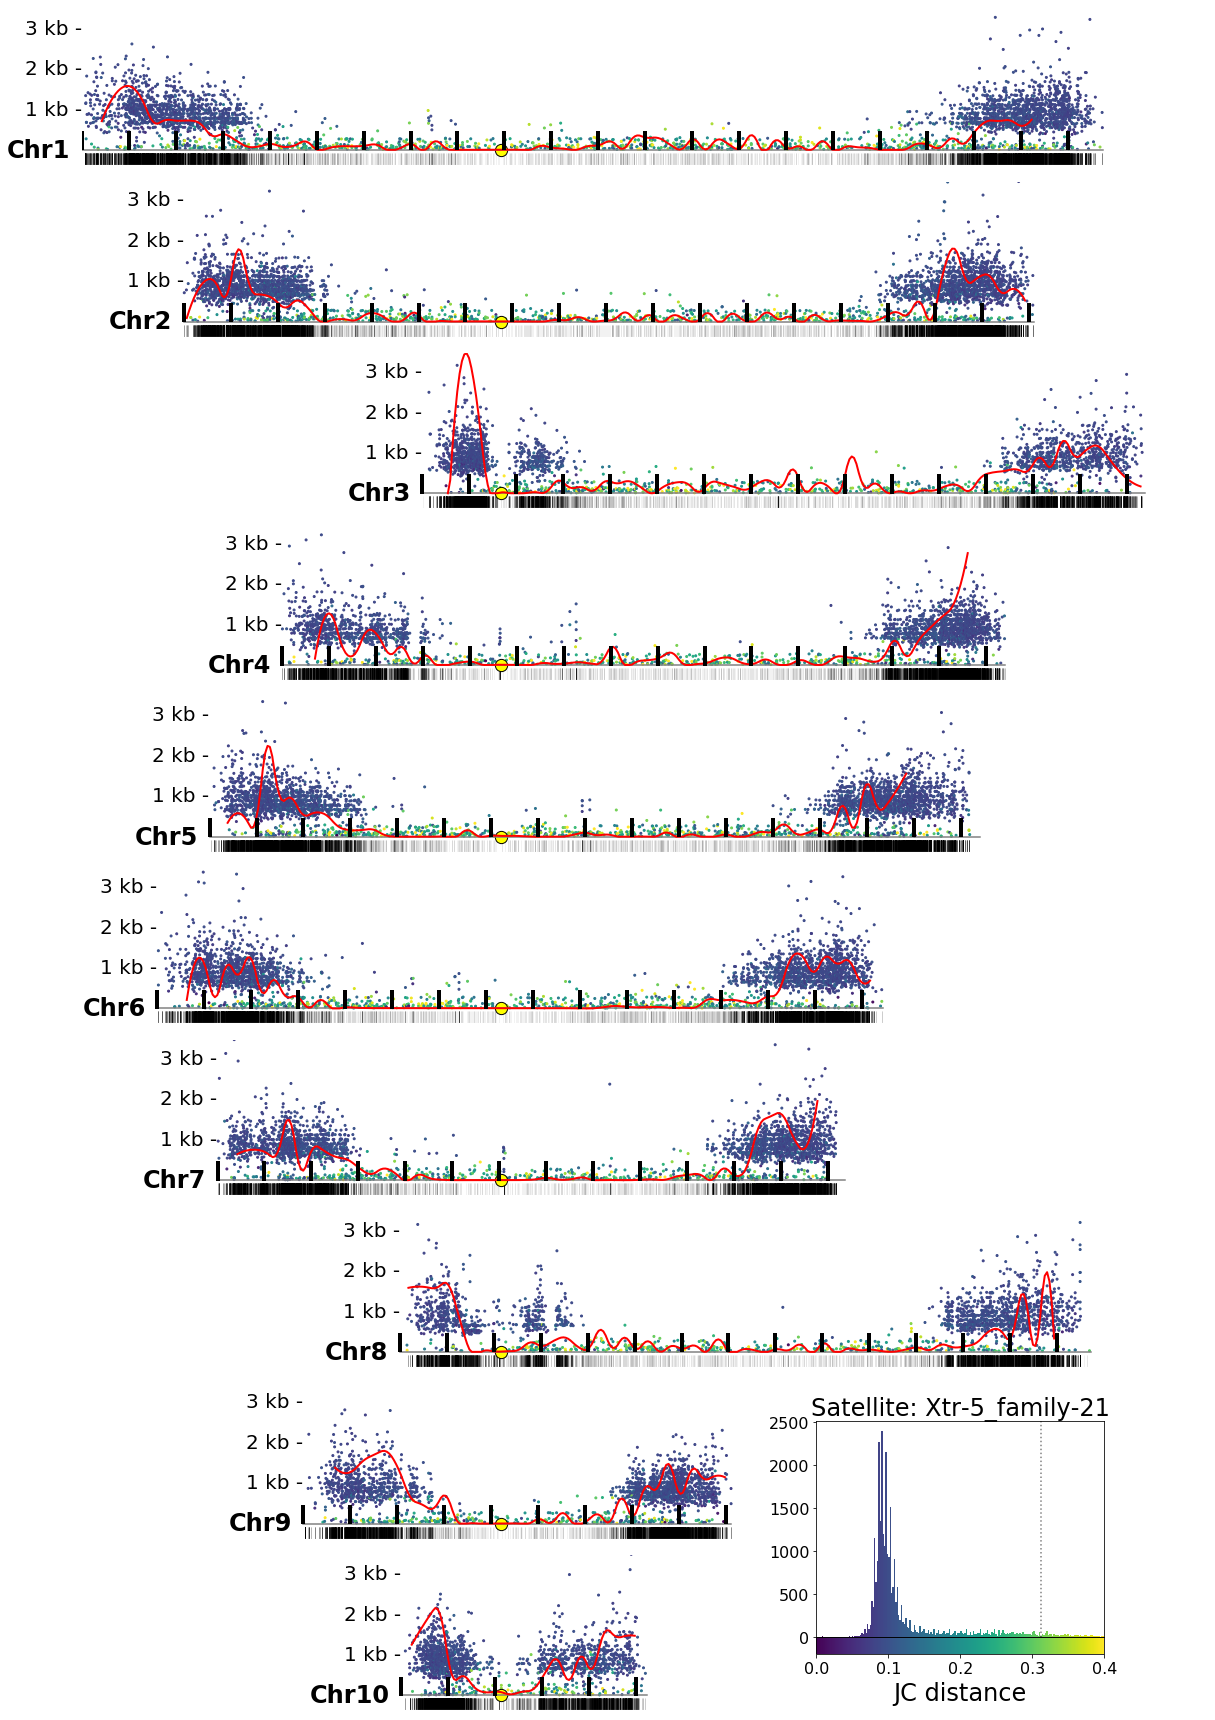

In [10]:
####### FOR PAPER
import matplotlib as mpl

Mb = 1000000

Repeat_gff_reclassified = Xtr_rm_reclassified

figure_size = (16,24)
scaler = 2


JC_max_val=0.5

repeat_name_ = 'Satellite: Xtr-5_family-21'
monomer_name_ = 'Chr3:13229190-13230304:113,9.9,113'
title = repeat_name_

JC_max_val = np.round(np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC,99),1) 

list_chromosomes = chr_sizes.Chr.tolist()

CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]

Largest_chr_len = float(chr_sizes.Length.max())*1.1


max_y_value, max_axis = 1,1
min_axis = -0.1

max_Length_sat = np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif==repeat_name_)].Length,99.9)
counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=figure_size)



for Chr_ in list_chromosomes:
    To_plot = Repeat_gff_reclassified[(Repeat_gff_reclassified.Chr==Chr_)]
    To_plot2 = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_)]  

    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
    chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
    
    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1, max_axis*1))
    
    axs[counter].text(delta_centromere/Largest_chr_len-0.01, 0, Chr_, fontsize=12*scaler, ha='right', va='center' , fontweight='bold')
    axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

    for repeat_name in [repeat_name_] :
        axs[counter].scatter((To_plot[To_plot.Motif==repeat_name].Start + delta_centromere)/Largest_chr_len, (To_plot[To_plot.Motif==repeat_name].Length)/max_Length_sat, c= To_plot[To_plot.Motif==repeat_name].JC,  alpha=1 , s=2*scaler, label=repeat_name,  cmap='viridis', vmax=JC_max_val, vmin=0) 
   
    ypos_inc = increment = (1/float(len([monomer_name_])))
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    if len(Rec_rate) > 0:
        x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='red', linewidth=1*scaler, alpha=1)

    ypos_inc = increment = (1/float(len([monomer_name_])))
    for monomer_name in [monomer_name_] :
        axs[counter].scatter(np.array((To_plot2[To_plot2.qseqid==monomer_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot2[To_plot2.qseqid==monomer_name].midpoint)*[-.1], marker='|', alpha=.1 , s=250*scaler, linewidth=.5, color='black',  label=monomer_name)

    
    for y_pos in range(0,int(max_Length_sat),1000):
        if y_pos>0:
            #axs[counter].text((Chr_size_+ delta_centromere)/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp')), fontsize=10, horizontalalignment='right', va='center')
            axs[counter].text(delta_centromere/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos/1000),' kb -')), fontsize=10*scaler, horizontalalignment='right', va='center')
    
    axs[counter].scatter(CTR_pos_normalized, 0, alpha=1, s=75*scaler, facecolor='yellow', edgecolors='black',  marker="o")#color='white')  # Centromere dot at the center of each chr

    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.1, ymax= .2,  alpha=1, color='black', linewidth=2*scaler)
        #axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .05,  alpha=1, color='black', linewidth=2) 
    counter=counter+1


    
x_p = 0.65  ; y_p = 0.04 
width_ = 0.25; height_ = 0.01
cax = fig.add_axes([x_p, y_p, width_, height_])
cmap = mpl.cm.viridis

norm = mpl.colors.Normalize(vmin=0, vmax=JC_max_val )
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,  norm=norm, orientation='horizontal')
label_ =''.join(('JC distance'))
cb2.set_label(label_, labelpad=5, y=1.2, fontsize=12*scaler)
x_tix_box = list(np.arange(0,JC_max_val+.1,.1))
cb2.set_ticks(x_tix_box,x_tix_box)
for t in cb2.ax.get_xticklabels():
     t.set_fontsize(8*scaler)
#cb2.tick_params(fontsize=10*scaler)
#cb2.tick_params(cb2.get_xticklabels(), fontsize=10*scaler)#, fontweight="bold", horizontalalignment="left")


x_p = x_p  ; y_p = y_p+height_
width_ = 0.25; height_ = 0.125
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC 
Y,X = np.histogram(data, bins='auto')
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)
        
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')
print len(data), len(X), max(Y), np.percentile(data,95)
plt.tight_layout()

#out_fig_name = ''.join(('/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis__',repeat_name_.replace(':','').replace('/','').replace(' ','_'),'_2000ppi.pdf'))
#out_fig_name= out_fig_name.replace(':','_')
#print "Saved as", out_fig_name
#plt.savefig(out_fig_name, bbox_inches='tight', transparent=True, ppi=2000)
plt.show()

###OK for publication :D. Then convert to TIFF (300 ppi)



4037 95 624 0.2744368457017603


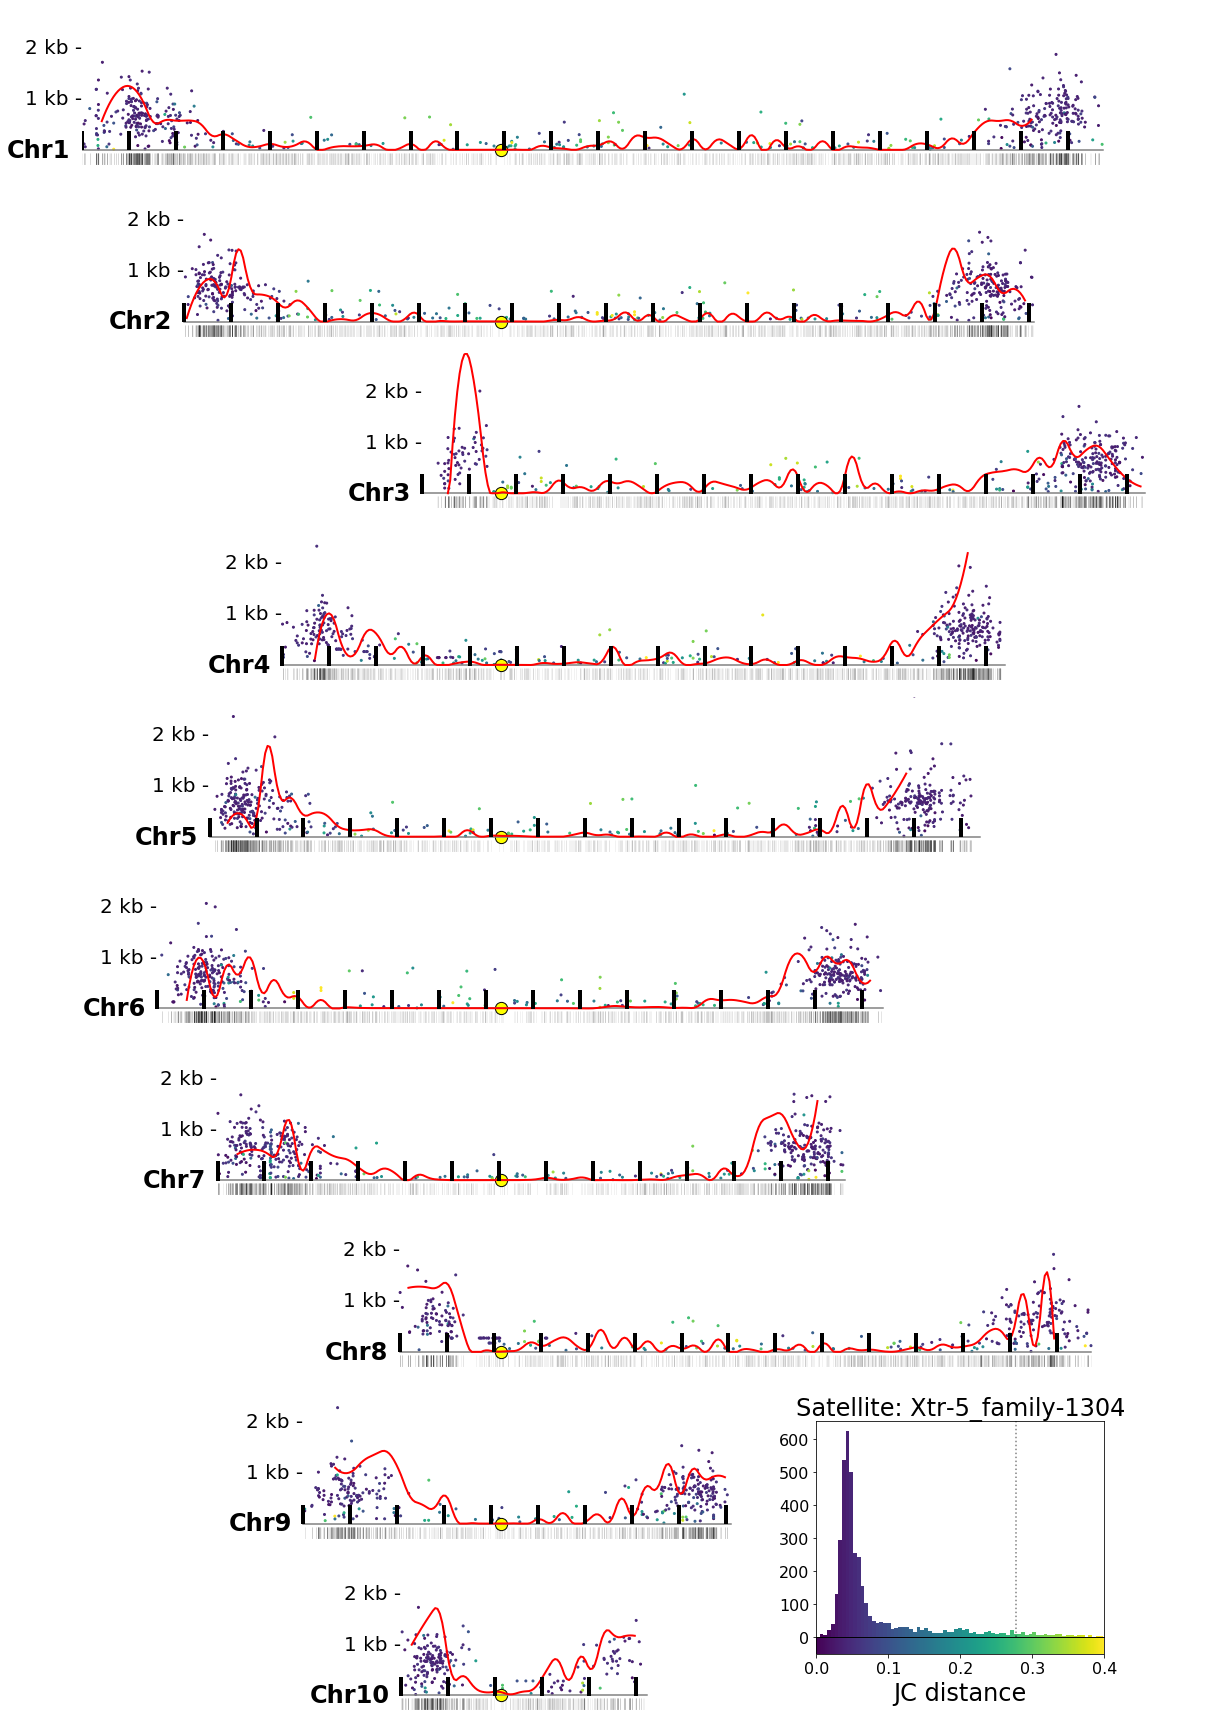

In [11]:
####### FOR PAPER
import matplotlib as mpl

Mb = 1000000

Repeat_gff_reclassified = Xtr_rm_reclassified

figure_size = (16,24)
scaler = 2


JC_max_val=0.5

repeat_name_ = 'Satellite: Xtr-5_family-1304'
monomer_name_ = 'Chr3:13648061-13649255:252,4.8,252'
title = repeat_name_

JC_max_val = np.round(np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC,99),1) 

list_chromosomes = chr_sizes.Chr.tolist()

CTR_pos_Chr1 = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr=='Chr1'].TandemRepeats)[0]

Largest_chr_len = float(chr_sizes.Length.max())*1.1


max_y_value, max_axis = 1,1
min_axis = -0.1

max_Length_sat = np.percentile(Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif==repeat_name_)].Length,99.9)
counter = 0
fig, axs = plt.subplots(len(list_chromosomes), figsize=figure_size)



for Chr_ in list_chromosomes:
    To_plot = Repeat_gff_reclassified[(Repeat_gff_reclassified.Chr==Chr_)]
    To_plot2 = blast_Cent_consensus_[(blast_Cent_consensus_.Chr==Chr_)]  

    Chr_size_ = list(chr_sizes[chr_sizes.Chr==Chr_].Length)[0]
    CTR_pos = list(Xtrop_centromere_positon[Xtrop_centromere_positon.Chr==Chr_].TandemRepeats)[0]
    delta_centromere = CTR_pos_Chr1 - CTR_pos
    CTR_pos_normalized =(CTR_pos+delta_centromere)/Largest_chr_len
    chr_size_normalized = (Chr_size_+delta_centromere)/Largest_chr_len
    
    axs[counter].set_xlim((0, 1))
    axs[counter].set_ylim((min_axis*1, max_axis*1))
    
    axs[counter].text(delta_centromere/Largest_chr_len-0.01, 0, Chr_, fontsize=12*scaler, ha='right', va='center' , fontweight='bold')
    axs[counter].axhline(0,xmin=delta_centromere/Largest_chr_len, xmax=chr_size_normalized, color='gray')

    for repeat_name in [repeat_name_] :
        axs[counter].scatter((To_plot[To_plot.Motif==repeat_name].Start + delta_centromere)/Largest_chr_len, (To_plot[To_plot.Motif==repeat_name].Length)/max_Length_sat, c= To_plot[To_plot.Motif==repeat_name].JC,  alpha=1 , s=2*scaler, label=repeat_name,  cmap='viridis', vmax=JC_max_val, vmin=0) 
   
    ypos_inc = increment = (1/float(len([monomer_name_])))
        
    axs[counter].spines['top'].set_visible(False)
    axs[counter].spines['right'].set_visible(False)
    axs[counter].spines['bottom'].set_visible(False)
    axs[counter].spines['left'].set_visible(False)
    axs[counter].get_xaxis().set_ticks([])
    axs[counter].get_yaxis().set_ticks([])
    
    if len(Rec_rate) > 0:
        x_positon = (Rec_rate[Rec_rate.Chr==Chr_]['Pos'] + Rec_rate[Rec_rate.Chr==Chr_].delta_pos/2) + delta_centromere
        x_positon_normalized = (x_positon)/Largest_chr_len
        axs[counter].plot(x_positon_normalized,Rec_rate[Rec_rate.Chr==Chr_].Smooth_Recombination_Rate*max_axis/Rec_rate.Smooth_Recombination_Rate.max(), color='red', linewidth=1*scaler, alpha=1)

    ypos_inc = increment = (1/float(len([monomer_name_])))
    for monomer_name in [monomer_name_] :
        axs[counter].scatter(np.array((To_plot2[To_plot2.qseqid==monomer_name].midpoint + delta_centromere)/Largest_chr_len), len(To_plot2[To_plot2.qseqid==monomer_name].midpoint)*[-.1], marker='|', alpha=0.1 , s=250*scaler, linewidth=.5, color='black',  label=monomer_name)

    
    for y_pos in range(0,int(max_Length_sat),1000):
        if y_pos>0:
            #axs[counter].text((Chr_size_+ delta_centromere)/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos),' bp')), fontsize=10, horizontalalignment='right', va='center')
            axs[counter].text(delta_centromere/Largest_chr_len,y_pos/float(max_Length_sat),''.join((str(y_pos/1000),' kb -')), fontsize=10*scaler, horizontalalignment='right', va='center')
    
    axs[counter].scatter(CTR_pos_normalized, 0, alpha=1, s=75*scaler, facecolor='yellow', edgecolors='black',  marker="o")#color='white')  # Centromere dot at the center of each chr

    for tick_10Mb in range(0, Chr_size_, 10*Mb):
        normalized_tick = (tick_10Mb  +delta_centromere)/Largest_chr_len  
        axs[counter].axvline(normalized_tick, ymin=0.1, ymax= .2,  alpha=1, color='black', linewidth=2*scaler)
        #axs[counter].axvline(normalized_tick, ymin=-.1, ymax= .05,  alpha=1, color='black', linewidth=2) 
    counter=counter+1


    
x_p = 0.65  ; y_p = 0.04 
width_ = 0.25; height_ = 0.01
cax = fig.add_axes([x_p, y_p, width_, height_])
cmap = mpl.cm.viridis

norm = mpl.colors.Normalize(vmin=0, vmax=JC_max_val )
cb2 = mpl.colorbar.ColorbarBase(cax, cmap=cmap,  norm=norm, orientation='horizontal')
label_ =''.join(('JC distance'))
cb2.set_label(label_, labelpad=5, y=1.2, fontsize=12*scaler)
x_tix_box = list(np.arange(0,JC_max_val+.1,.1))
cb2.set_ticks(x_tix_box,x_tix_box)
for t in cb2.ax.get_xticklabels():
     t.set_fontsize(8*scaler)
#cb2.tick_params(fontsize=10*scaler)
#cb2.tick_params(cb2.get_xticklabels(), fontsize=10*scaler)#, fontweight="bold", horizontalalignment="left")


x_p = x_p  ; y_p = y_p+height_
width_ = 0.25; height_ = 0.125
dax = fig.add_axes([x_p, y_p, width_, height_])

data= Repeat_gff_reclassified[(Repeat_gff_reclassified.Motif.isin([repeat_name_]))].JC 
Y,X = np.histogram(data, bins='auto')
x_span = JC_max_val
C = pd.Series(X).apply(lambda x: cmap(norm(x))).to_list()
width_hist=(X[1]-X[0])/2

dax.bar(X[:-1]-width_hist,Y,color=C,width=X[1]-X[0])
dax.set_xlim(-.01, JC_max_val)
dax.set_xticks([])
dax.set_title(repeat_name_, fontsize=12*scaler)
for t in dax.get_yticklabels():
    t.set_fontsize(8*scaler)
        
dax.axvline(np.percentile(data,95), ls=':',alpha=0.5, color='black')
print len(data), len(X), max(Y), np.percentile(data,95)
plt.tight_layout()

#out_fig_name = ''.join(('/global/cscratch1/sd/sofiamr/SAPS/X_tropicalis_V10_Final/DATA_OUT/Xtropicalis__',repeat_name_.replace(':','').replace('/','_').replace(' ','_'),'_2000ppi.pdf'))
#out_fig_name= out_fig_name.replace(':','_')
#print "Saved as", out_fig_name
#plt.savefig(out_fig_name, bbox_inches='tight', transparent=True, ppi=2000)
plt.show()

###OK for publication :D. Then convert to TIFF (300 ppi)

